# Ford Go-Bike
## by Salma Youssef

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. For February 2019

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading in the dataset:

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df_bikes = pd.read_csv('201902-fordgobike-tripdata (1).csv')

## Exploration

In [4]:
# high-level overview of data shape and composition
print(df_bikes.shape)
print(df_bikes.dtypes)
print(df_bikes.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [5]:
# descriptive statistics for numeric variables
print(df_bikes.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [6]:
# information about dataset 
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# how many ride duration equals 5 minutes?
df_bikes[df_bikes.duration_sec == 300].count()

duration_sec               250
start_time                 250
end_time                   250
start_station_id           249
start_station_name         249
start_station_latitude     250
start_station_longitude    250
end_station_id             249
end_station_name           249
end_station_latitude       250
end_station_longitude      250
bike_id                    250
user_type                  250
member_birth_year          244
member_gender              244
bike_share_for_all_trip    250
dtype: int64

In [8]:
# how many female bikers?
df_bikes[df_bikes.member_gender == 'Female'].count()

duration_sec               40844
start_time                 40844
end_time                   40844
start_station_id           40805
start_station_name         40805
start_station_latitude     40844
start_station_longitude    40844
end_station_id             40805
end_station_name           40805
end_station_latitude       40844
end_station_longitude      40844
bike_id                    40844
user_type                  40844
member_birth_year          40844
member_gender              40844
bike_share_for_all_trip    40844
dtype: int64

In [9]:
# how many male bikers?
df_bikes[df_bikes.member_gender == 'Male'].count()

duration_sec               130651
start_time                 130651
end_time                   130651
start_station_id           130500
start_station_name         130500
start_station_latitude     130651
start_station_longitude    130651
end_station_id             130500
end_station_name           130500
end_station_latitude       130651
end_station_longitude      130651
bike_id                    130651
user_type                  130651
member_birth_year          130651
member_gender              130651
bike_share_for_all_trip    130651
dtype: int64

In [10]:
df_bikes.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### What is the structure of your dataset?

> 183412 rows, 12 columns holding information of each person's bike trip data. their trip duration, bike id, gender and some more attributes

> the data contains only February of year 2019 in the San Francisco Bay Area

### What is/are the main feature(s) of interest in your dataset?

> gender can affect participation in trip durations or participation?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> trip duration, gender and user type

## Cleaning Data
  ##### We discovered null values, wrong data types and some unwanted columns that will all be cleaned in next steps 

In [13]:
#dropping unwanted columns 
df_bikes.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
        axis=1, inplace = True)

In [14]:
#check for dropped columns
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [15]:
#fixing wrong datatype of start_time and end_time to be datetime
df_bikes[['start_time','end_time']] = df_bikes[['start_time','end_time']].apply(pd.to_datetime)

In [16]:
#fixing more columns datatypes
df_bikes[['start_station_id','end_station_id',]] = df_bikes[['start_station_id','end_station_id',]].astype(str)
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183412 non-null  object        
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  int64         
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  object        
dtypes: datetime64[ns

In [17]:
df_bikes.insert(1, 'duration_minutes', df_bikes.duration_sec/60)
df_bikes.insert(2, 'duration_hours', df_bikes.duration_sec/3600)

df_bikes.head()

,duration_sec,duration_minutes,duration_hours,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.750000,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,708.683333,11.811389,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,1030.900000,17.181667,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,608.166667,10.136111,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,26.416667,0.440278,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [27]:
df_bikes.isnull().sum()

duration_sec                  0
duration_minutes              0
duration_hours                0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
end_station_id                0
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [29]:
df_bikes = df_bikes.dropna()
df_bikes.isnull().sum()

duration_sec               0
duration_minutes           0
duration_hours             0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [31]:
print(df_bikes.describe())

        duration_sec  duration_minutes  duration_hours        bike_id  \
count  174952.000000     174952.000000   174952.000000  174952.000000   
mean      704.002744         11.733379        0.195556    4482.587555   
std      1642.204905         27.370082        0.456168    1659.195937   
min        61.000000          1.016667        0.016944      11.000000   
25%       323.000000          5.383333        0.089722    3799.000000   
50%       510.000000          8.500000        0.141667    4960.000000   
75%       789.000000         13.150000        0.219167    5505.000000   
max     84548.000000       1409.133333       23.485556    6645.000000   

       member_birth_year  
count      174952.000000  
mean         1984.803135  
std            10.118731  
min          1878.000000  
25%          1980.000000  
50%          1987.000000  
75%          1992.000000  
max          2001.000000  


## Univariate Exploration

> In this section we will investigate distributions of individual variables

#### Starting with our main goal; trip duration distribition 

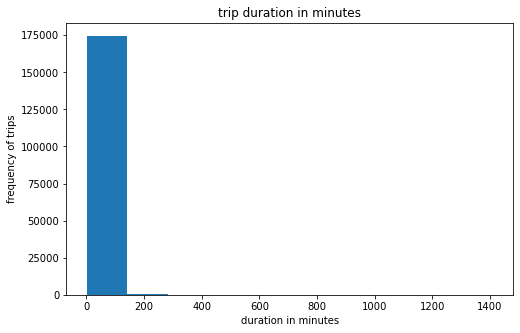

In [30]:
#average time in a trip
binsize = 500
bins = np.arange(0, df_bikes['duration_minutes'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = df_bikes, x = 'duration_minutes');
plt.title('trip duration in minutes')
plt.xlabel('duration in minutes')
plt.ylabel('frequency of trips');

#### the data is not normally distributed

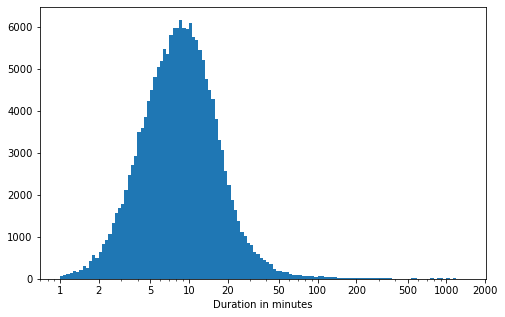

In [32]:
# dealing with the outlier, trying to see more clearly through a log scale 
new_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_bikes['duration_minutes'].max())+new_binsize, new_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_bikes, x = 'duration_minutes', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration in minutes');

#### now it's beginning to look like normal distribution 

#### most trips takes < 50 minutes 

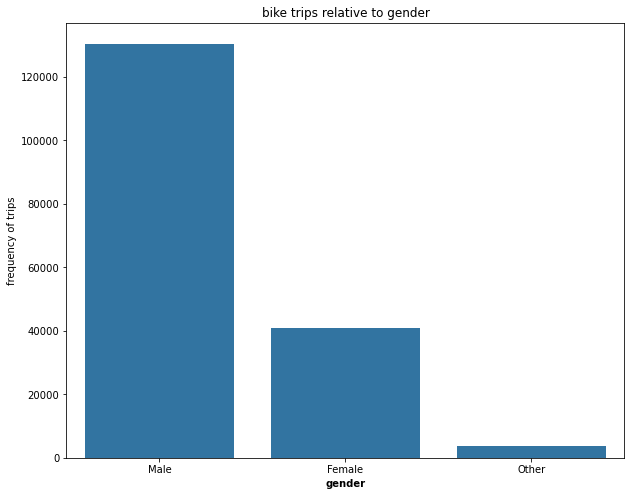

In [37]:
# now moving to member gender
plt.figure(figsize=[10, 8])
gender = df_bikes['member_gender'].value_counts().index
sb.countplot(data = df_bikes, x='member_gender', color = sb.color_palette()[0], order = gender)

plt.title('bike trips relative to gender')
plt.xlabel('gender', fontweight = 'bold' )
plt.ylabel('frequency of trips');

#### male use more bikes than females by a huge percentage

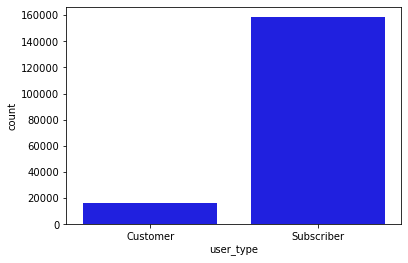

In [40]:
sb.countplot(data = df_bikes, x = 'user_type', color = 'blue');

#### number of subscribed users are greater than customers by a vast difference

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes i did clean some data in the process 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes i did clean some data in the process

## Bivariate Exploration

> In this section we will investigate relationships between pairs of variables

### To start off with, I want to look at the pairwise correlations present between features in the data.

In [42]:
numeric_vals = ['duration_sec','duration_minutes','duration_hours', 'start_time', 'end_time', 'start_station_id', 
                     'end_station_id', 'bike_id', 'member_birth_year']
#numeric_vars = ['duration_min', 'member_age']
categoric_vals = ['member_gender', 'user_type']

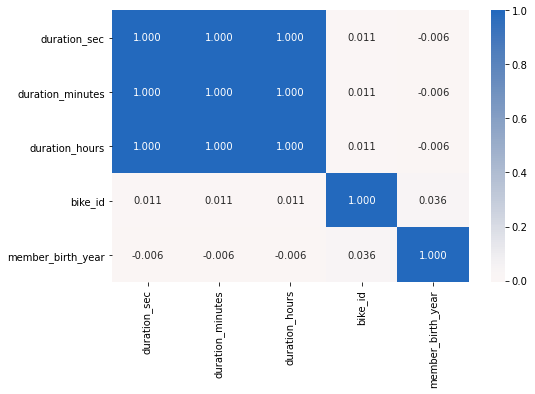

In [43]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_bikes[numeric_vals].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### there might not be a correlation between our numeric values 

C:\Users\Salma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


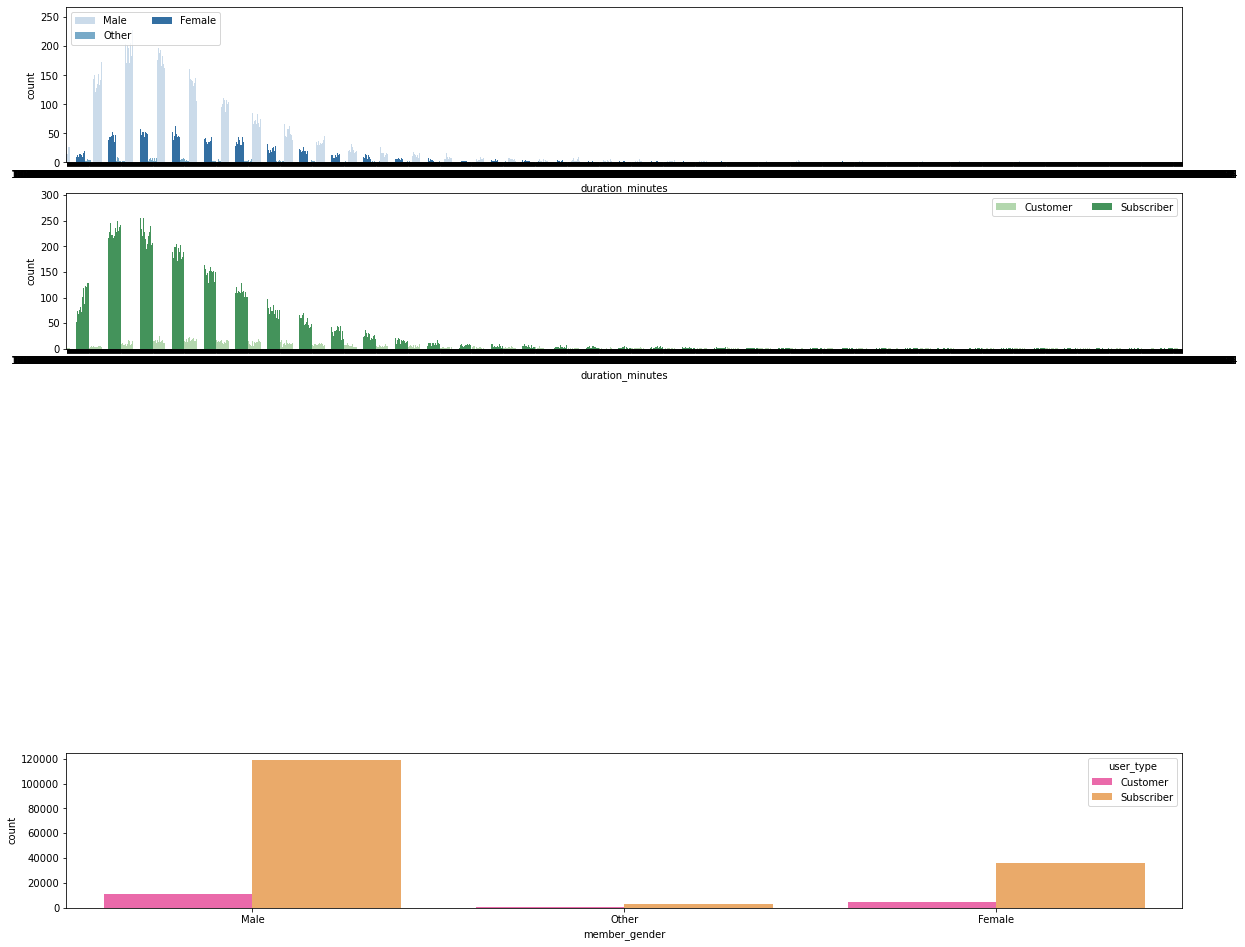

In [51]:
plt.figure(figsize = [20, 20]);

ax = plt.subplot(6, 1, 2);
sb.countplot(data = df_bikes, x = 'duration_minutes', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping

ax = plt.subplot(6, 1, 3);
sb.countplot(data = df_bikes, x = 'duration_hours', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

ax = plt.subplot(6, 1, 6);

sb.countplot(data = df_bikes, x = 'member_gender', hue = 'user_type', palette = 'spring');

#### males use bike more often than women 
#### males also take more time than women 

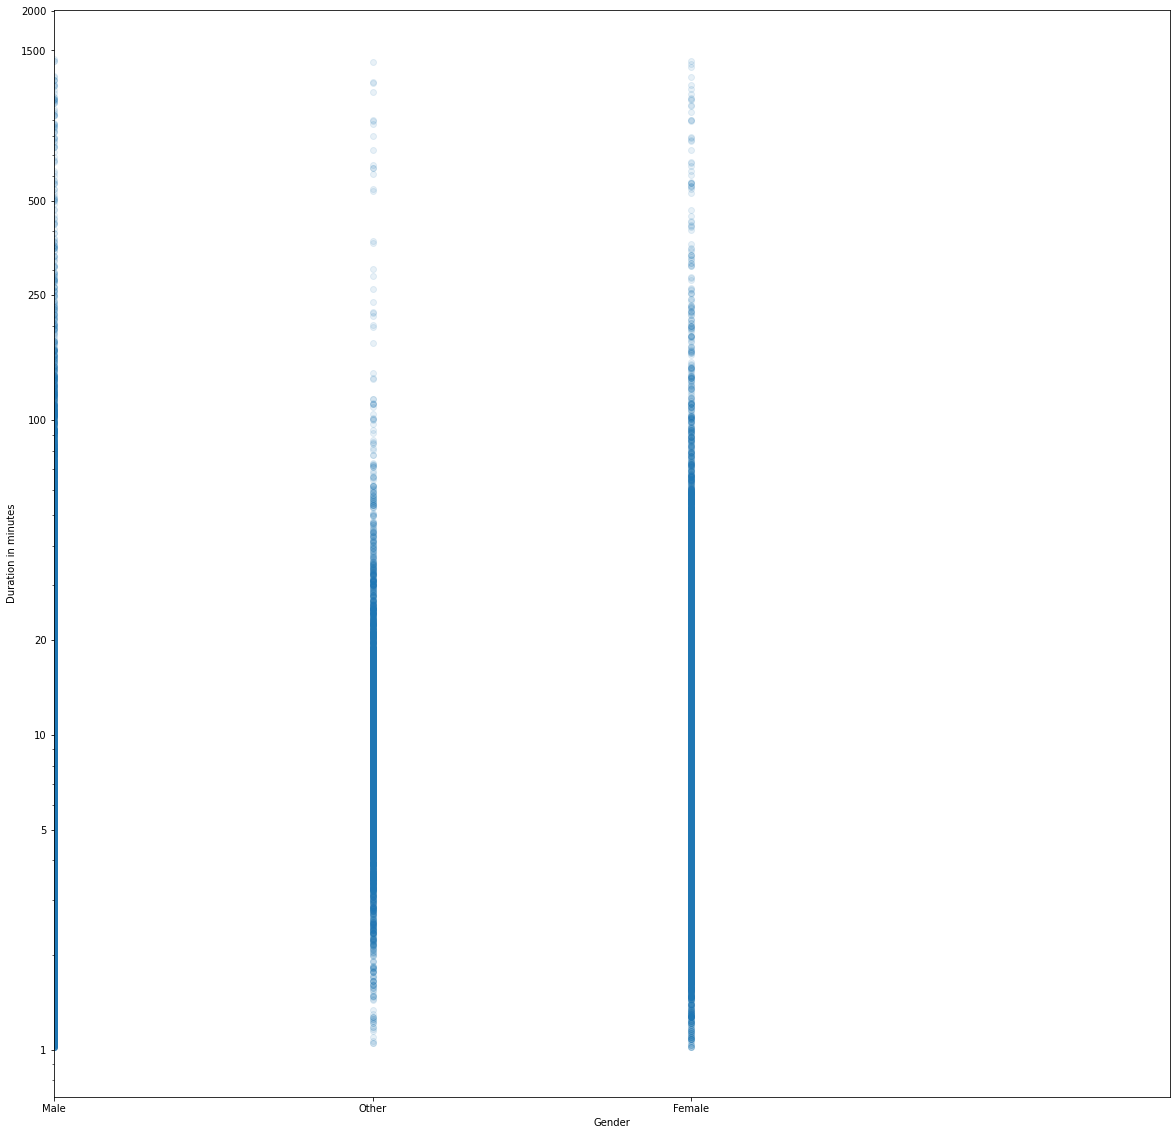

In [57]:
# scatter plot of duration in minutes vs. gender
plt.figure(figsize = [20, 20])
plt.scatter(data = df_bikes, x = 'member_gender', y = 'duration_minutes', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('Gender')
plt.yscale('log')
plt.yticks([1, 5, 10, 20, 100, 250, 500, 1500, 2000], [1, 5, 10, 20, 100, 250, 500, 1500, 2000]);
plt.ylabel('Duration in minutes')
plt.show()

#### males tend to finish their trip in less 5 minutes than females
#### whiles females in trips taking more than 100 minutes finish faster

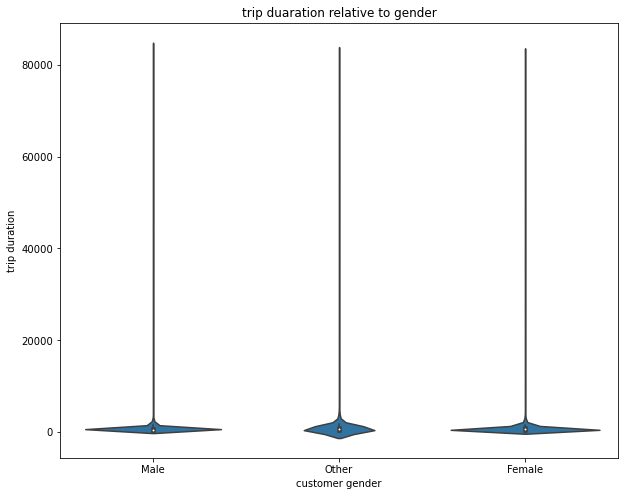

In [60]:
#gender and trip duration 
plt.figure(figsize = [10, 8])
sb.violinplot(data = df_bikes, x = 'member_gender', y = 'duration_sec', color = sb.color_palette()[0])
plt.title('trip duaration relative to gender')
plt.xlabel('customer gender')
plt.ylabel('trip duration');

#### seems like duration in females and males are greater than "other"

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Males users are much more females in 'subscriber' and 'customer', males also have min trip durations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> no, they seem normal

## Multivariate Exploration

> In this section we will create plots of three or more variables

### In this section i want to explore relation between gender and user  type as categorial values and trip duration as numeric value

(150.0, 300.0)

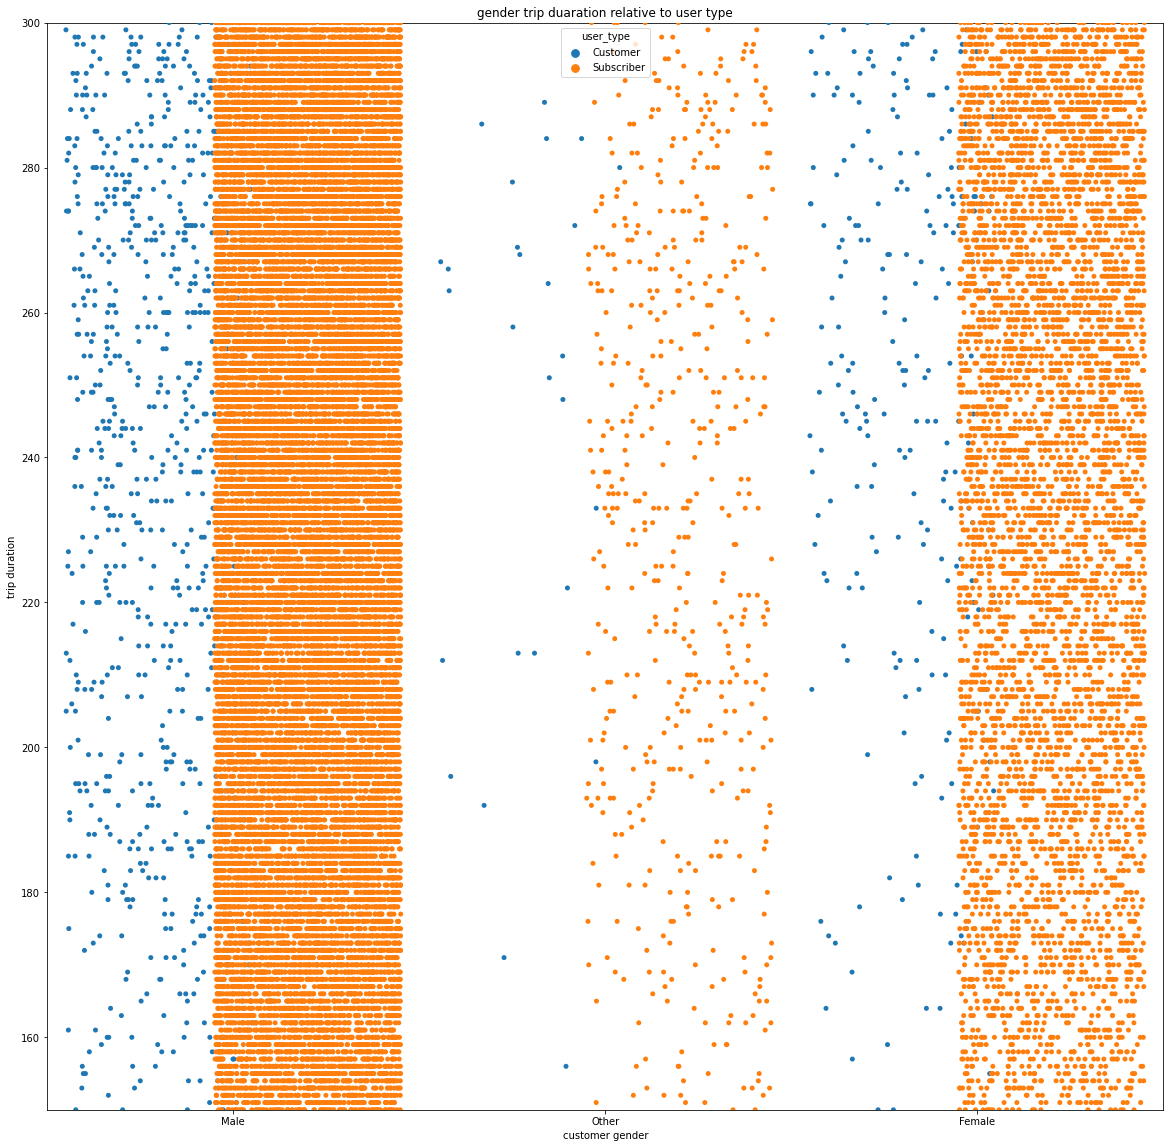

In [95]:
plt.figure(figsize = [20, 20])
sb.stripplot(data = df_bikes, x = 'member_gender', y = 'duration_minutes', hue = 'user_type', jitter = 0.5, dodge = True)

plt.title('gender trip duaration relative to user type')
plt.xlabel('customer gender')
plt.ylabel('trip duration');

plt.ylim(150, 300)
#plt.margins(0.05)   # Values in (-0.5, 0.0) zooms in to center

#### male subscribers takes more time in their trip than female subscribers,
#### also male customers takes more time in their trip than female customers

In [97]:
# select female subscribers
female_flag = (df_bikes['member_gender'] == 'Female') & (df_bikes['user_type'] == 'Subscriber')
trip_female = df_bikes.loc[female_flag,:]

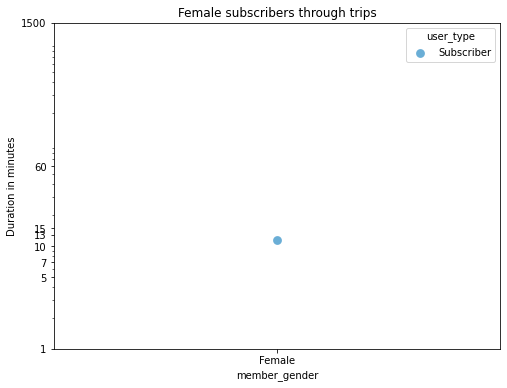

In [102]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = trip_female, x = 'member_gender', y = 'duration_minutes', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Female subscribers through trips')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 5, 7, 10, 13, 15, 60, 1500], [1, 5, 7, 10, 13, 15, 60, 1500])
ax.set_yticklabels([],minor = True)
plt.show();

In [100]:
# select male subscribers
male_flag = (df_bikes['member_gender'] == 'Male') & (df_bikes['user_type'] == 'Subscriber')
trip_male = df_bikes.loc[male_flag,:]

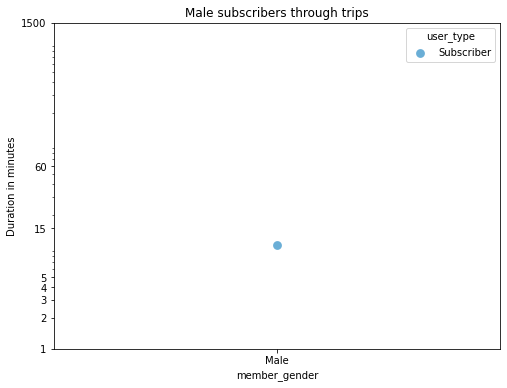

In [101]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = trip_male, x = 'member_gender', y = 'duration_minutes', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Male subscribers through trips')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 5, 7, 10, 13, 15, 60, 1500], [1, 5, 7, 10, 13, 15, 60, 1500])
ax.set_yticklabels([],minor = True)
plt.show();

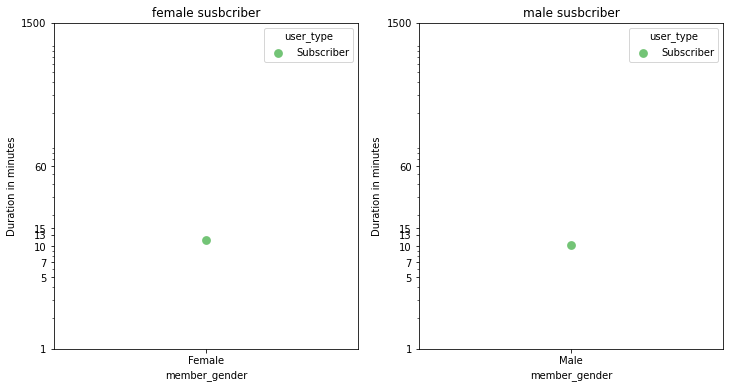

In [104]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sb.pointplot(data = trip_female, x = 'member_gender', y = 'duration_minutes', hue = 'user_type',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('female susbcriber')
ax[0].set_ylabel('Duration in minutes')
ax[0].set_yscale('log')
ax[0].set_yticks([1, 5, 7, 10, 13, 15, 60, 1500])
ax[0].set_yticklabels(['1', '5', '7', '10', '13', '15', '60', '1500'])
ax[0].set_yticklabels([],minor = True)

sb.pointplot(data = trip_male, x = 'member_gender', y = 'duration_minutes', hue = 'user_type',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('male susbcriber')
ax[1].set_ylabel('Duration in minutes')
ax[1].set_yscale('log')
ax[1].set_yticks([1, 5, 7, 10, 13, 15, 60, 1500])
ax[1].set_yticklabels(['1', '5', '7', '10', '13', '15', '60', '1500'])
ax[1].set_yticklabels([],minor = True)
plt.show();

In [106]:
# select customers
customer_flag = (df_bikes['user_type'] == 'Customer')
trip_cus = df_bikes.loc[customer_flag,:]

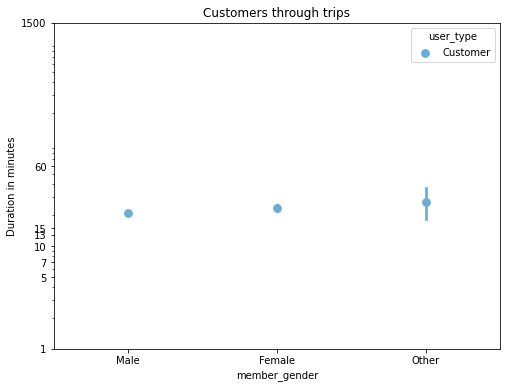

In [107]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = trip_cus, x = 'member_gender', y = 'duration_minutes', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Customers through trips')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 5, 7, 10, 13, 15, 60, 1500], [1, 5, 7, 10, 13, 15, 60, 1500])
ax.set_yticklabels([],minor = True)
plt.show();

#### Final observation on all multivariate investigation:
##### By looking at the errorbars in both pointplots; we can conclude that there are no major differences between female and male subscribers 
##### Also no differences between genders in customers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the relation between gender, their trip duration and their user types

> I think they were more independent of each other that they did not strengthen each other

### Were there any interesting or surprising interactions between features?

> male bikers take longer trip duration on average compared to female bikers.

> male subscribers takes more time in their trip than female subscribers

> also male customers takes more time in their trip than female customers


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!